In [1]:
import numpy as np
import pandas as pd
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae

# 1. Importing dataset

In [2]:
data=pd.read_csv('analytic_data2021.csv', header=0,low_memory=False)

In [3]:
data=data.drop([0])

In [4]:
data.head()

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Release Year,County Ranked (Yes=1/No=0),Premature death raw value,Premature death numerator,Premature death denominator,...,% Females raw value,% Females numerator,% Females denominator,% Females CI low,% Females CI high,% Rural raw value,% Rural numerator,% Rural denominator,% Rural CI low,% Rural CI high
1,00,000,00000,US,United States,2021,NaN,6906.6410942,3854074,915437195,...,0.5075019531,166582199,328239523,NaN,NaN,0.1926902892,NaN,NaN,NaN,NaN
2,01,000,01000,AL,Alabama,2021,NaN,9819.8874313,82249,13651801,...,0.5167392215,2533668,4903185,NaN,NaN,0.409631829,1957932,4779736,NaN,NaN
3,01,001,01001,AL,Autauga County,2021,1,7830.0534837,787,155765,...,0.5150799191,28777,55869,NaN,NaN,0.4200216232,22921,54571,NaN,NaN
4,01,003,01003,AL,Baldwin County,2021,1,7680.4772697,3147,600539,...,0.5150962667,114987,223234,NaN,NaN,0.4227909911,77060,182265,NaN,NaN
5,01,005,01005,AL,Barbour County,2021,1,11476.629416,515,69011,...,0.4707931621,11622,24686,NaN,NaN,0.677896347,18613,27457,NaN,NaN


# 2. Data Preprocessing and EDA

## Select column with 'raw value'

In [5]:
new_columns=[]
for column in data.columns:
    if 'raw value' in column:
        new_columns.append(column)

In [6]:
new_columns=pd.Series(new_columns)
data1=data[new_columns]

In [7]:
data1.head()

,Premature death raw value,Poor or fair health raw value,Poor physical health days raw value,Poor mental health days raw value,Low birthweight raw value,Adult smoking raw value,Adult obesity raw value,Food environment index raw value,Physical inactivity raw value,Access to exercise opportunities raw value,...,% 65 and older raw value,% Non-Hispanic Black raw value,% American Indian & Alaska Native raw value,% Asian raw value,% Native Hawaiian/Other Pacific Islander raw value,% Hispanic raw value,% Non-Hispanic White raw value,% not proficient in English raw value,% Females raw value,% Rural raw value
1,6906.6410942,0.1650958341,3.7419351474,4.0627918637,0.0815951602,0.1662246666,0.297,7.8,0.227,0.8416869169,...,0.164691511,0.1253581154,0.0127592557,0.0594226491,0.0024583785,0.1845366958,0.601115369,0.0432660204,0.5075019531,0.1926902892
2,9819.8874313,0.2137580922,4.4169654739,4.8856364811,0.1031937927,0.1998983096,0.361,5.5,0.293,0.6111228737,...,0.1733234622,0.2646799988,0.0070972235,0.0150341054,0.0010421797,0.0455373395,0.6528058803,0.011006831,0.5167392215,0.409631829
3,7830.0534837,0.1983917887,4.501498764,4.8502135182,0.0920177384,0.1981076587,0.33,6.7,0.306,0.6913012406,...,0.1597307988,0.1986432548,0.0047611377,0.011741753,0.0010381428,0.029909252,0.7377078523,0.0080325135,0.5150799191,0.4200216232
4,7680.4772697,0.1646067529,3.6479777573,4.7682935308,0.0829200929,0.1851331826,0.3,7.8,0.247,0.7371354895,...,0.2097798722,0.0860755978,0.0078034708,0.0106614584,0.0006898591,0.0471881523,0.8320730713,0.0070845825,0.5150962667,0.4227909911
5,11476.629416,0.2984149992,5.5692666827,5.5904935124,0.1135531136,0.2553076754,0.412,5.5,0.28,0.5316676986,...,0.1969132302,0.4782872883,0.0068864944,0.0046990197,0.0021064571,0.0452483189,0.4551162602,0.0189072131,0.4707931621,0.677896347


In [8]:
# Since we only need ranked data (not addition measurements), 
# delete the columns that after 'Life expectancy raw value'
data1.columns.get_loc('Life expectancy raw value')

35

In [9]:
data2=data1.drop(data1.iloc[:,35:],axis=1)

In [10]:
# To simplify the column names, delete the substring 'raw value'
new_column_name=[]
for column in data2.columns:
    new_column_name.append(column[:-10])
data2.columns=new_column_name
data2.head()

,Premature death,Poor or fair health,Poor physical health days,Poor mental health days,Low birthweight,Adult smoking,Adult obesity,Food environment index,Physical inactivity,Access to exercise opportunities,...,Income inequality,Children in single-parent households,Social associations,Violent crime,Injury deaths,Air pollution - particulate matter,Drinking water violations,Severe housing problems,Driving alone to work,Long commute - driving alone
1,6906.6410942,0.1650958341,3.7419351474,4.0627918637,0.0815951602,0.1662246666,0.297,7.8,0.227,0.8416869169,...,4.9138011333,0.2551269205,9.291114225,386.46489648,72.318503459,7.2,NaN,0.1754312254,0.7633084156,0.366
2,9819.8874313,0.2137580922,4.4169654739,4.8856364811,0.1031937927,0.1998983096,0.361,5.5,0.293,0.6111228737,...,5.2381653052,0.3181370581,12.320292414,479.91918191,84.463386666,9.2,0.1044776119,0.1388165531,0.8569986957,0.346
3,7830.0534837,0.1983917887,4.501498764,4.8502135182,0.0920177384,0.1981076587,0.33,6.7,0.306,0.6913012406,...,5.0904084014,0.2474062855,12.229995863,272.28222006,68.410042594,10.4,0,0.1363096652,0.8578851228,0.383
4,7680.4772697,0.1646067529,3.6479777573,4.7682935308,0.0829200929,0.1851331826,0.3,7.8,0.247,0.7371354895,...,4.3851346284,0.2237227148,10.503527167,203.66039629,72.878640649,7.2,0,0.1299665069,0.8376010565,0.404
5,11476.629416,0.2984149992,5.5692666827,5.5904935124,0.1135531136,0.2553076754,0.412,5.5,0.28,0.5316676986,...,5.9819927971,0.5100810251,7.6363490213,414.27786068,76.988946587,9.4,0,0.1371055495,0.8211638926,0.309


In [11]:
# Summary Statistics
data2.describe()

,Premature death,Poor or fair health,Poor physical health days,Poor mental health days,Low birthweight,Adult smoking,Adult obesity,Food environment index,Physical inactivity,Access to exercise opportunities,...,Income inequality,Children in single-parent households,Social associations,Violent crime,Injury deaths,Air pollution - particulate matter,Drinking water violations,Severe housing problems,Driving alone to work,Long commute - driving alone
count,3133,3194,3194,3194,3089,3194,3194,3175,3194,3188,...,3193,3193,3194,3003,3084,3168,3149,3194,3194,3194
unique,3132,3192,3192,3192,2979,3192,328,83,309,3112,...,3192,3185,3036,2959,3080,115,51,3099,3188,569
top,7955.6615772,0.1650958341,3.7419351474,4.0627918637,0.0694444444,0.1662246666,0.34,7.7,0.264,1,...,7.1541630447,0,0,0,62.134957127,8.7,0,0.0869565217,0.8238866397,0.359
freq,2,2,2,2,5,2,33,150,32,60,...,2,4,138,40,2,110,1904,5,2,18


## Handling Missing Values

In [12]:
# To get a sense of missing value, calculate the percentage of misssin values in each column
missing = data2.isnull().sum()/ len(data2)
# missing= pd. DataFrame({'column_name': data2.columns,
# 'percent_missing': percent_missing})
missing

Premature death                         0.019098
Poor or fair health                     0.000000
Poor physical health days               0.000000
Poor mental health days                 0.000000
Low birthweight                         0.032874
Adult smoking                           0.000000
Adult obesity                           0.000000
Food environment index                  0.005949
Physical inactivity                     0.000000
Access to exercise opportunities        0.001879
Excessive drinking                      0.000000
Alcohol-impaired driving deaths         0.010645
Sexually transmitted infections         0.048215
Teen births                             0.054164
Uninsured                               0.000313
Primary care physicians                 0.046963
Dentists                                0.027865
Mental health providers                 0.069192
Preventable hospital stays              0.014089
Mammography screening                   0.006262
Flu vaccinations    

#### From the result, we can see there exists missing values in some columns, but the proportions are very low (less than 10%), thus we need to impute missing values. Since mean values are sensitive to outliers, we choose to fill the missing values by the median of each column

In [13]:
# change the data type of cells from string to numeric
for column in data2.columns:
    data2[column]=pd.to_numeric(data2[column])

In [14]:
# Fill null value by meidan of each column
data2=data2.fillna(data2.median())

In [15]:
# Check
data2.isnull().any().sum()

0

## Dealing with outliers

#### To deal with outliers, calculate the sigma of each value, if sigma is larger than 3 or less than -3, regrad it outlier

In [16]:
zscore = data2 - data2.mean()
sigma=zscore/data2.std()

<IPython.core.display.Javascript object>


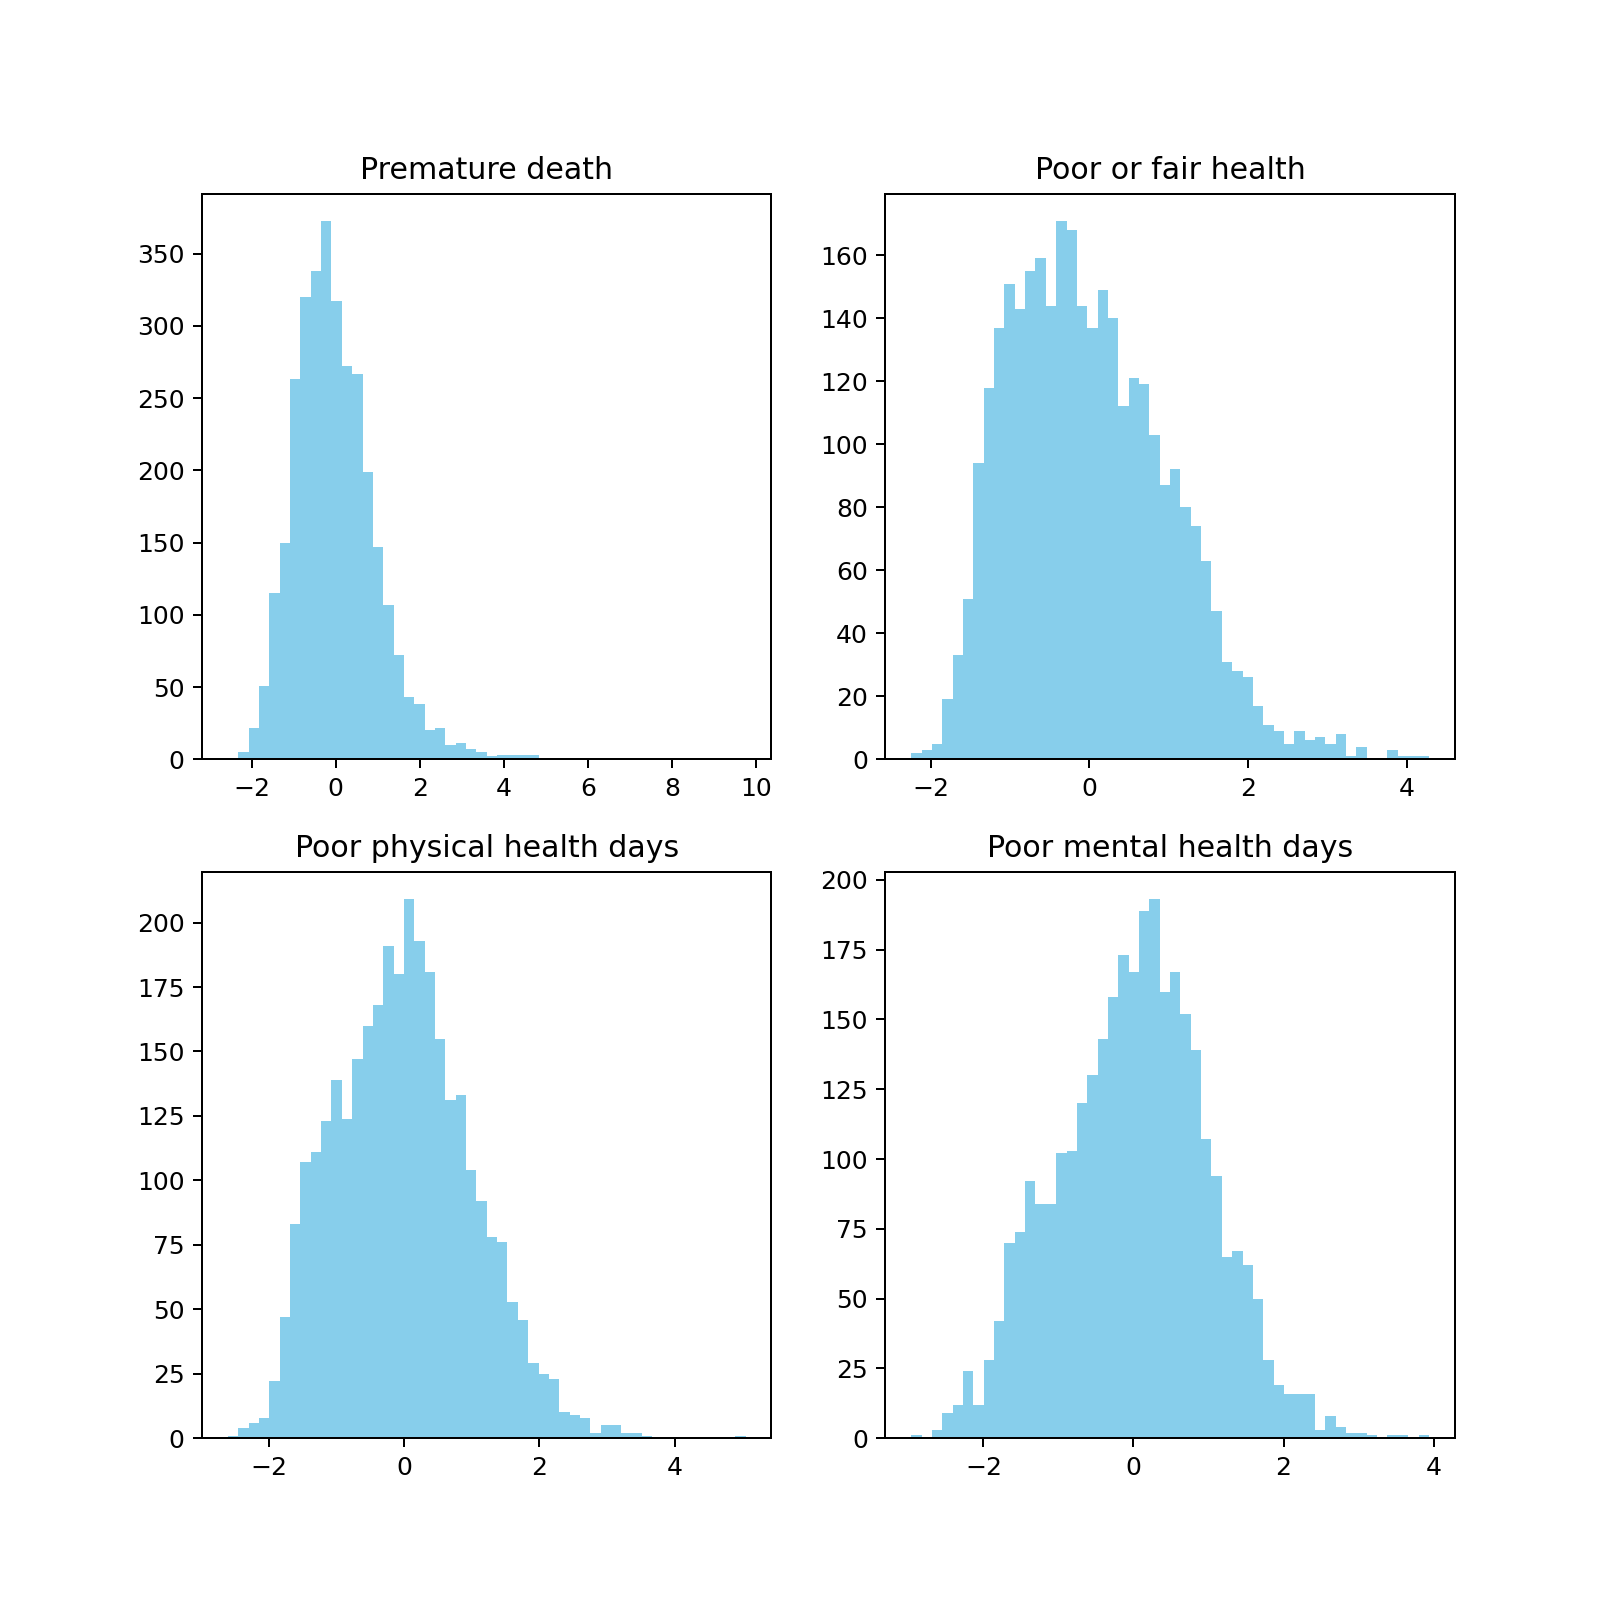

In [17]:
# Plot histogram to give some examples of the outliers
%matplotlib notebook
plt.figure(figsize=(5,5))
plt.subplot(221)
plt.hist(sigma['Premature death'],bins=50,color = "skyblue")
plt.title('Premature death')

plt.subplot(222)
plt.hist(sigma['Poor or fair health'],bins=50,color = "skyblue")
plt.title('Poor or fair health')

plt.subplot(223)
plt.hist(sigma['Poor physical health days'],bins=50,color = "skyblue")
plt.title('Poor physical health days')

plt.subplot(224)
plt.hist(sigma['Poor mental health days'],bins=50,color = "skyblue")
plt.title('Poor mental health days')
plt.show()


In [18]:
# Make the sigma value 0 for outliers
for i in sigma.index:
    for column in sigma.columns:
        if (sigma[column][i]>3) | (sigma[column][i]<-3):
            sigma[column][i]=0

<IPython.core.display.Javascript object>


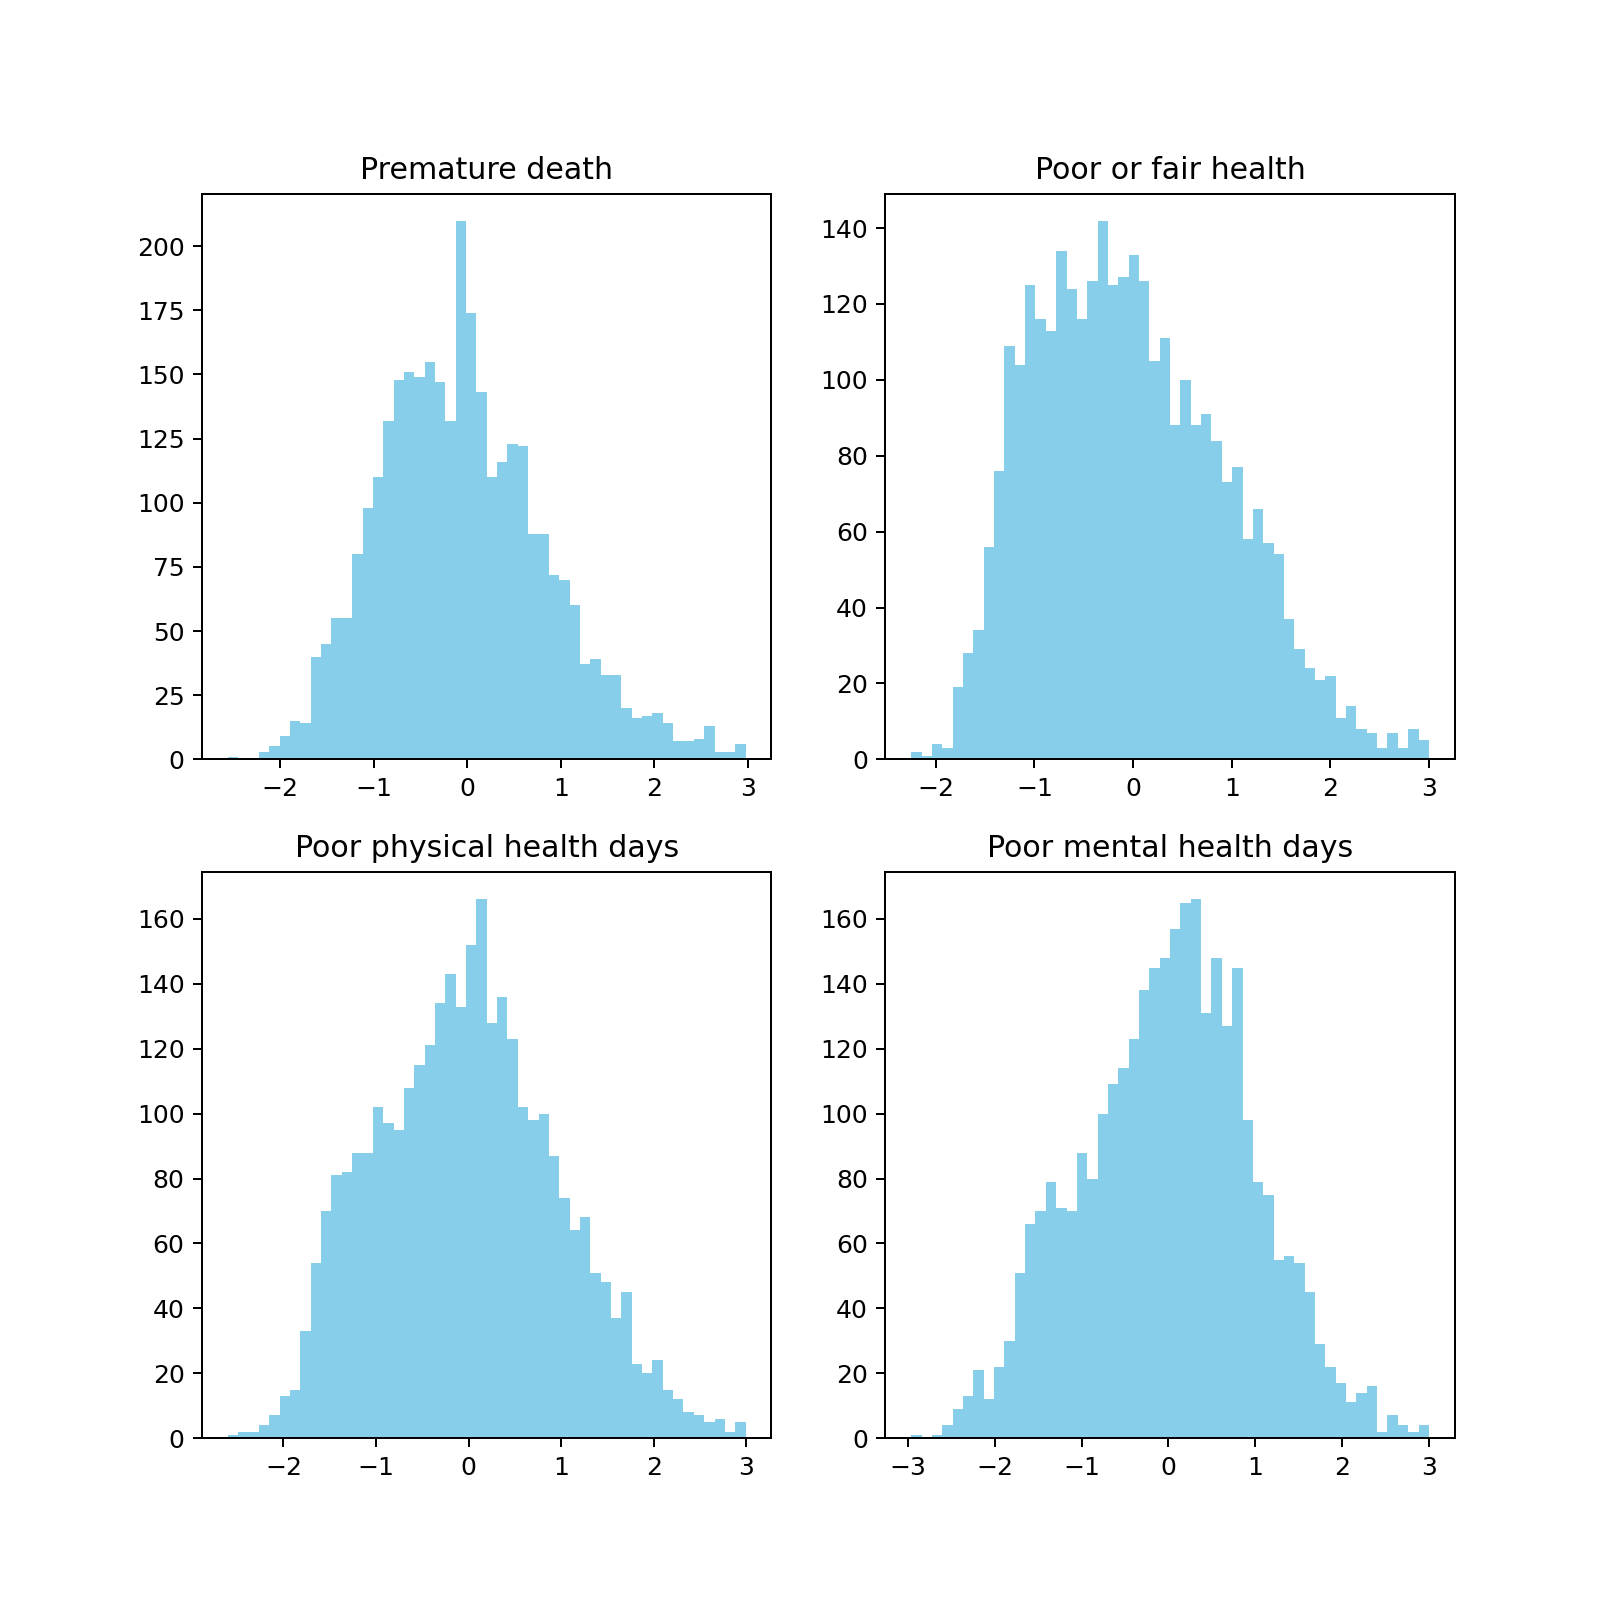

In [19]:
# Plot again after handling the outliers
%matplotlib notebook
plt.figure(figsize=(5,5))
plt.subplot(221)
plt.hist(sigma['Premature death'],bins=50,color = "skyblue")
plt.title('Premature death')

plt.subplot(222)
plt.hist(sigma['Poor or fair health'],bins=50,color = "skyblue")
plt.title('Poor or fair health')

plt.subplot(223)
plt.hist(sigma['Poor physical health days'],bins=50,color = "skyblue")
plt.title('Poor physical health days')

plt.subplot(224)
plt.hist(sigma['Poor mental health days'],bins=50,color = "skyblue")
plt.title('Poor mental health days')
plt.show()

## Normalization

#### The sigma dataframe is the normalized verson of original data, and it will be used for further work in this project

## Correlation matrix to reduce redundancy

#### To avoid data leakage, delete outcome variables

In [20]:
data_features=sigma.drop(sigma.columns[[0,1,2,3,4]],axis = 1)

#### To reduce the colinearity, calculate the correlation value between each variables and delete those have strong relationship

In [21]:
corr_matrix=data_features.corr()

<IPython.core.display.Javascript object>


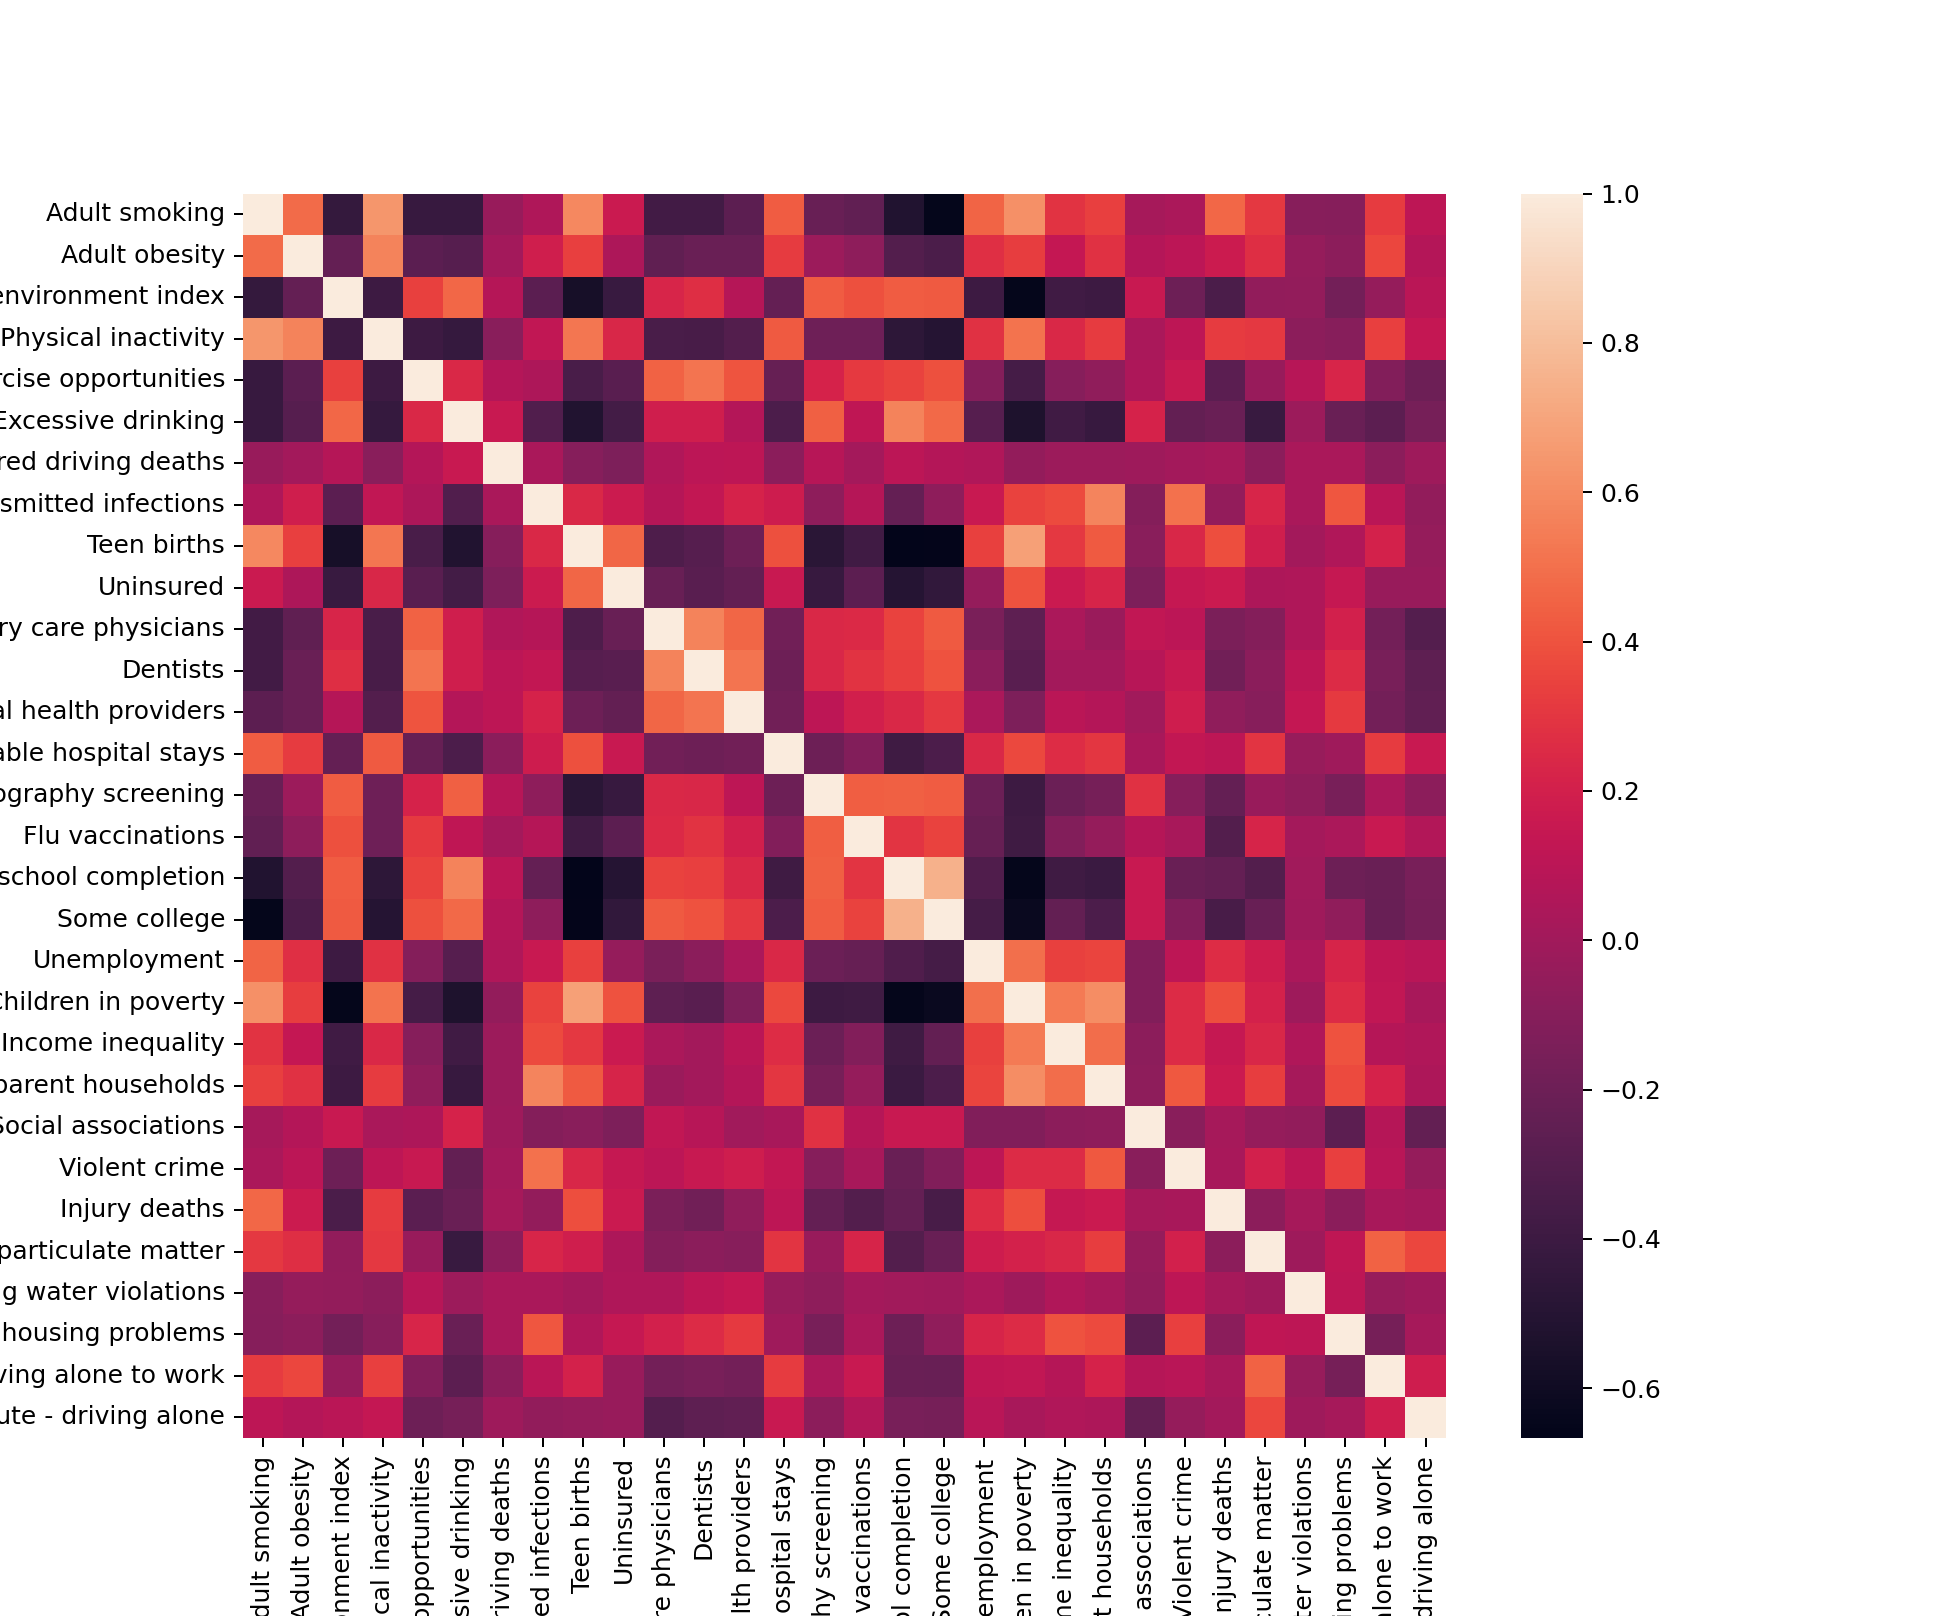

In [22]:
%matplotlib notebook
plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns)
plt.show()

In [23]:
# If the correlation value is larger than 0.7, we regard them strongly related.
# Select variable that are strongly related
for i in corr_matrix.index:
    for c in corr_matrix.columns:
        if (abs(corr_matrix[c][i]) > 0.7) &(abs(corr_matrix[c][i]) < 1):
            print(' '+i+'   '+c)

 High school completion   Some college
 Some college   High school completion


### From the result, we can get variables that are hight correlated: high school completion with some college. Delete 'Some college' 

In [24]:
data_features=data_features.drop(columns=['Some college'])

# 3. Model Building

## Clustering

### Do clustering by applying K-Means. To find noteworthy groupings of counties that have similar health outcomes and behaviors

In [25]:
# Find the best K
k_candidates = []
K = range(1,50)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data_features)
    k_candidates.append(kmeanModel.inertia_)

<IPython.core.display.Javascript object>


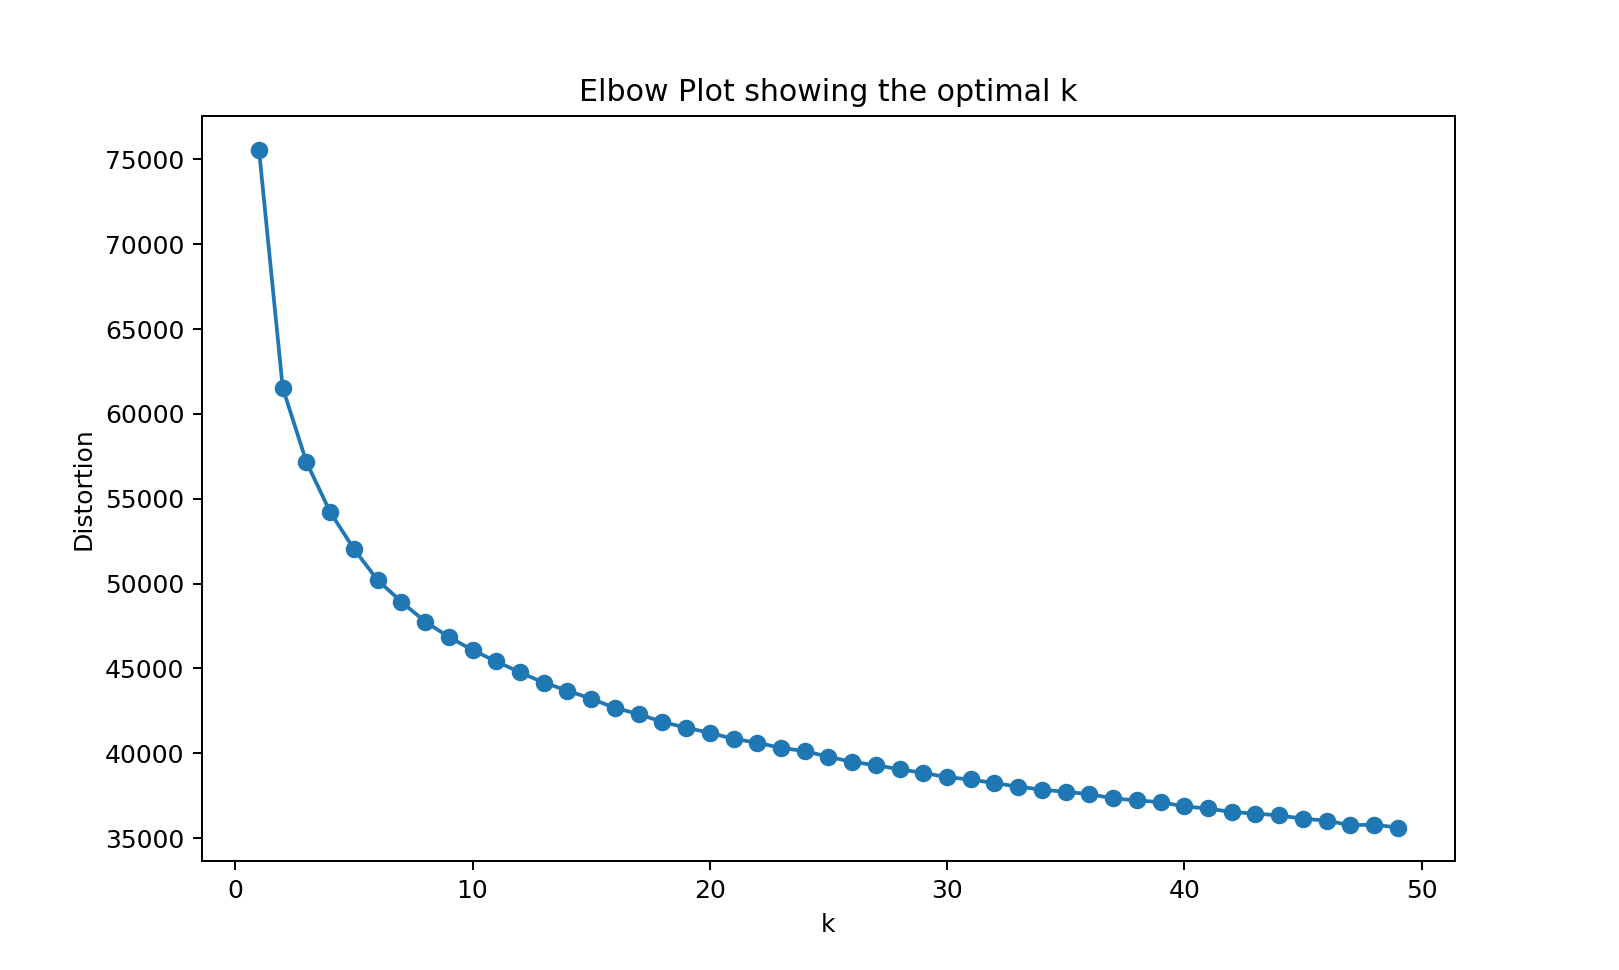

In [26]:
%matplotlib notebook
plt.figure(figsize=(5,3))
plt.plot(K, k_candidates, 'o-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Plot showing the optimal k')
plt.show()

### From the result, we can see after K=10, the curve becomes very flatten, thus we choose K=10

In [27]:
# Run the KMeans model
kmeans = KMeans(n_clusters=10, random_state=0).fit(data_features)

In [28]:
clusteing_label=pd.DataFrame(kmeans.labels_,columns=['Group'])

In [29]:
# To analyze the similarities of conties, combine demographic data with the features
data_demographic=pd.DataFrame(data.iloc[:,0:5])
data_outcome=pd.DataFrame(sigma.iloc[:,0:5])
clusteing_label['index']=range(1,3195,1)
clusteing_label=clusteing_label.set_index('index')
clustering_result=pd.concat([data_demographic,data_outcome,data_features,clusteing_label],axis=1)
clustering_result.head()

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Premature death,Poor or fair health,Poor physical health days,Poor mental health days,Low birthweight,...,Children in single-parent households,Social associations,Violent crime,Injury deaths,Air pollution - particulate matter,Drinking water violations,Severe housing problems,Driving alone to work,Long commute - driving alone,Group
1,00,000,00000,US,United States,-0.586065,-0.696567,-0.825795,-0.905107,-0.006251,...,0.110417,-0.383246,0.720592,-0.641186,-0.258798,-0.789746,0.868966,-0.434070,0.367079,9
2,01,000,01000,AL,Alabama,0.503416,0.256886,0.044122,0.330377,1.070561,...,0.745595,0.129655,1.219199,-0.169011,0.932999,-0.573286,0.056338,0.793351,0.208494,9
3,01,001,01001,AL,Autauga County,-0.240732,-0.044190,0.153061,0.277190,0.513372,...,0.032589,0.114366,0.111392,-0.793141,1.648077,-0.789746,0.000700,0.804964,0.501877,2
4,01,003,01003,AL,Baldwin County,-0.296669,-0.706150,-0.946879,0.154189,0.059804,...,-0.206155,-0.177960,-0.254726,-0.619408,-0.258798,-0.789746,-0.140080,0.539226,0.668391,4
5,01,005,01005,AL,Barbour County,1.122996,1.915592,1.529103,1.388706,1.587031,...,2.680501,-0.663432,0.868983,-0.459606,1.052178,-0.789746,0.018364,0.323885,-0.084888,6


In [30]:
premature_death=clustering_result.groupby('Group')['Premature death'].mean()
Poor_fair_health=clustering_result.groupby('Group')['Poor or fair health'].mean()
Poor_physical_health_days=clustering_result.groupby('Group')['Poor physical health days'].mean()
Poor_mental_health_days=clustering_result.groupby('Group')['Poor mental health days'].mean()
Low_birthweight=clustering_result.groupby('Group')['Low birthweight'].mean()
result_table=pd.concat([premature_death,Poor_fair_health,Poor_physical_health_days,
                        Poor_mental_health_days,Low_birthweight],axis=1)


In [31]:
result_table

,Premature death,Poor or fair health,Poor physical health days,Poor mental health days,Low birthweight
Group,,,,,
0,-0.368940,-0.814594,-0.895355,-0.968916,-0.554343
1,0.943856,1.192947,1.422826,1.435486,0.418208
2,0.297061,0.385545,0.463721,0.608662,0.132966
3,-1.061216,-1.060796,-0.981940,-0.847204,-0.407747
4,-0.392442,-0.452826,-0.295077,-0.039566,-0.380744
5,0.172248,0.748154,0.300526,-0.055745,-0.147551
6,0.993439,1.267347,1.036299,0.834844,1.294897
7,-0.827288,-1.098912,-1.173137,-1.254695,-0.913321
8,-0.095370,-0.265871,0.003175,-0.208142,-0.251804


### If the value is less than 0, which means less than the average value of US, HEALTHY
### If the value is more than 0, which means more than the average value of US, UNHEALTHY
    #### Group 0: All 5 outcomes are below the average level of US. Citizens are relatively healthy especially in mental health
    #### Group 1: All 5 outcomes are above the average level of US. Citizens are relatively unhealthy especailly in physical and mental health
    #### Group 2: All 5 outcomes are above the average level of US but not very significant. Citizens's health condition is in the middle level, more likely to be unhealthy
    #### Group 3: All 5 outcomes are below the average level of US. Premature death years are the least compared with other groups, very healthy
    #### Group 4: All 5 outcomes are below the average level of US but not very significant. Citizens's helath condition is in the middle, more likely to be healthy
    #### Group 5: Some outcomes are below the average while others are above the average. Mental health and birthweith is a little bit unhealthy but overall, citizens are healthy
    #### Group 6: All 5 outcomes are above the average level of US. The low birthweight is very significant
    #### Group 7: All 5 outcomes are below the average level of US but not very significant. Citizens are healthy especially in physical
    #### Group 8: Some outcomes are below the average while others are above the average. Health condition is in the middle
    #### Group 9: All 5 outcomes are above the average level of US. Not healthy in mental and low birthweith is a little bit significant

In [32]:
clustering_result.groupby(['Group']).size()

Group
0    236
1    279
2    424
3    333
4    476
5    212
6    323
7    314
8    250
9    347
dtype: int64

In [33]:
# Applying pivot to analyze the result combined with demographic data
# Get the cross-table of US state and clustering group result
pivot=clustering_result.pivot_table(index='State Abbreviation',columns='Group',values='Name', aggfunc='count')
pivot

Group,0,1,2,3,4,5,6,7,8,9
State Abbreviation,,,,,,,,,,
AK,1.0,NaN,NaN,2.0,NaN,4.0,NaN,NaN,17.0,6.0
AL,NaN,5.0,23.0,NaN,2.0,NaN,31.0,NaN,NaN,7.0
AR,NaN,21.0,18.0,NaN,3.0,1.0,24.0,NaN,NaN,9.0
AZ,1.0,NaN,1.0,2.0,NaN,2.0,3.0,NaN,7.0,NaN
CA,NaN,NaN,NaN,27.0,1.0,1.0,1.0,NaN,16.0,13.0
CO,6.0,NaN,NaN,27.0,1.0,4.0,NaN,NaN,26.0,1.0
CT,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN
DC,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
DE,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,3.0


<IPython.core.display.Javascript object>


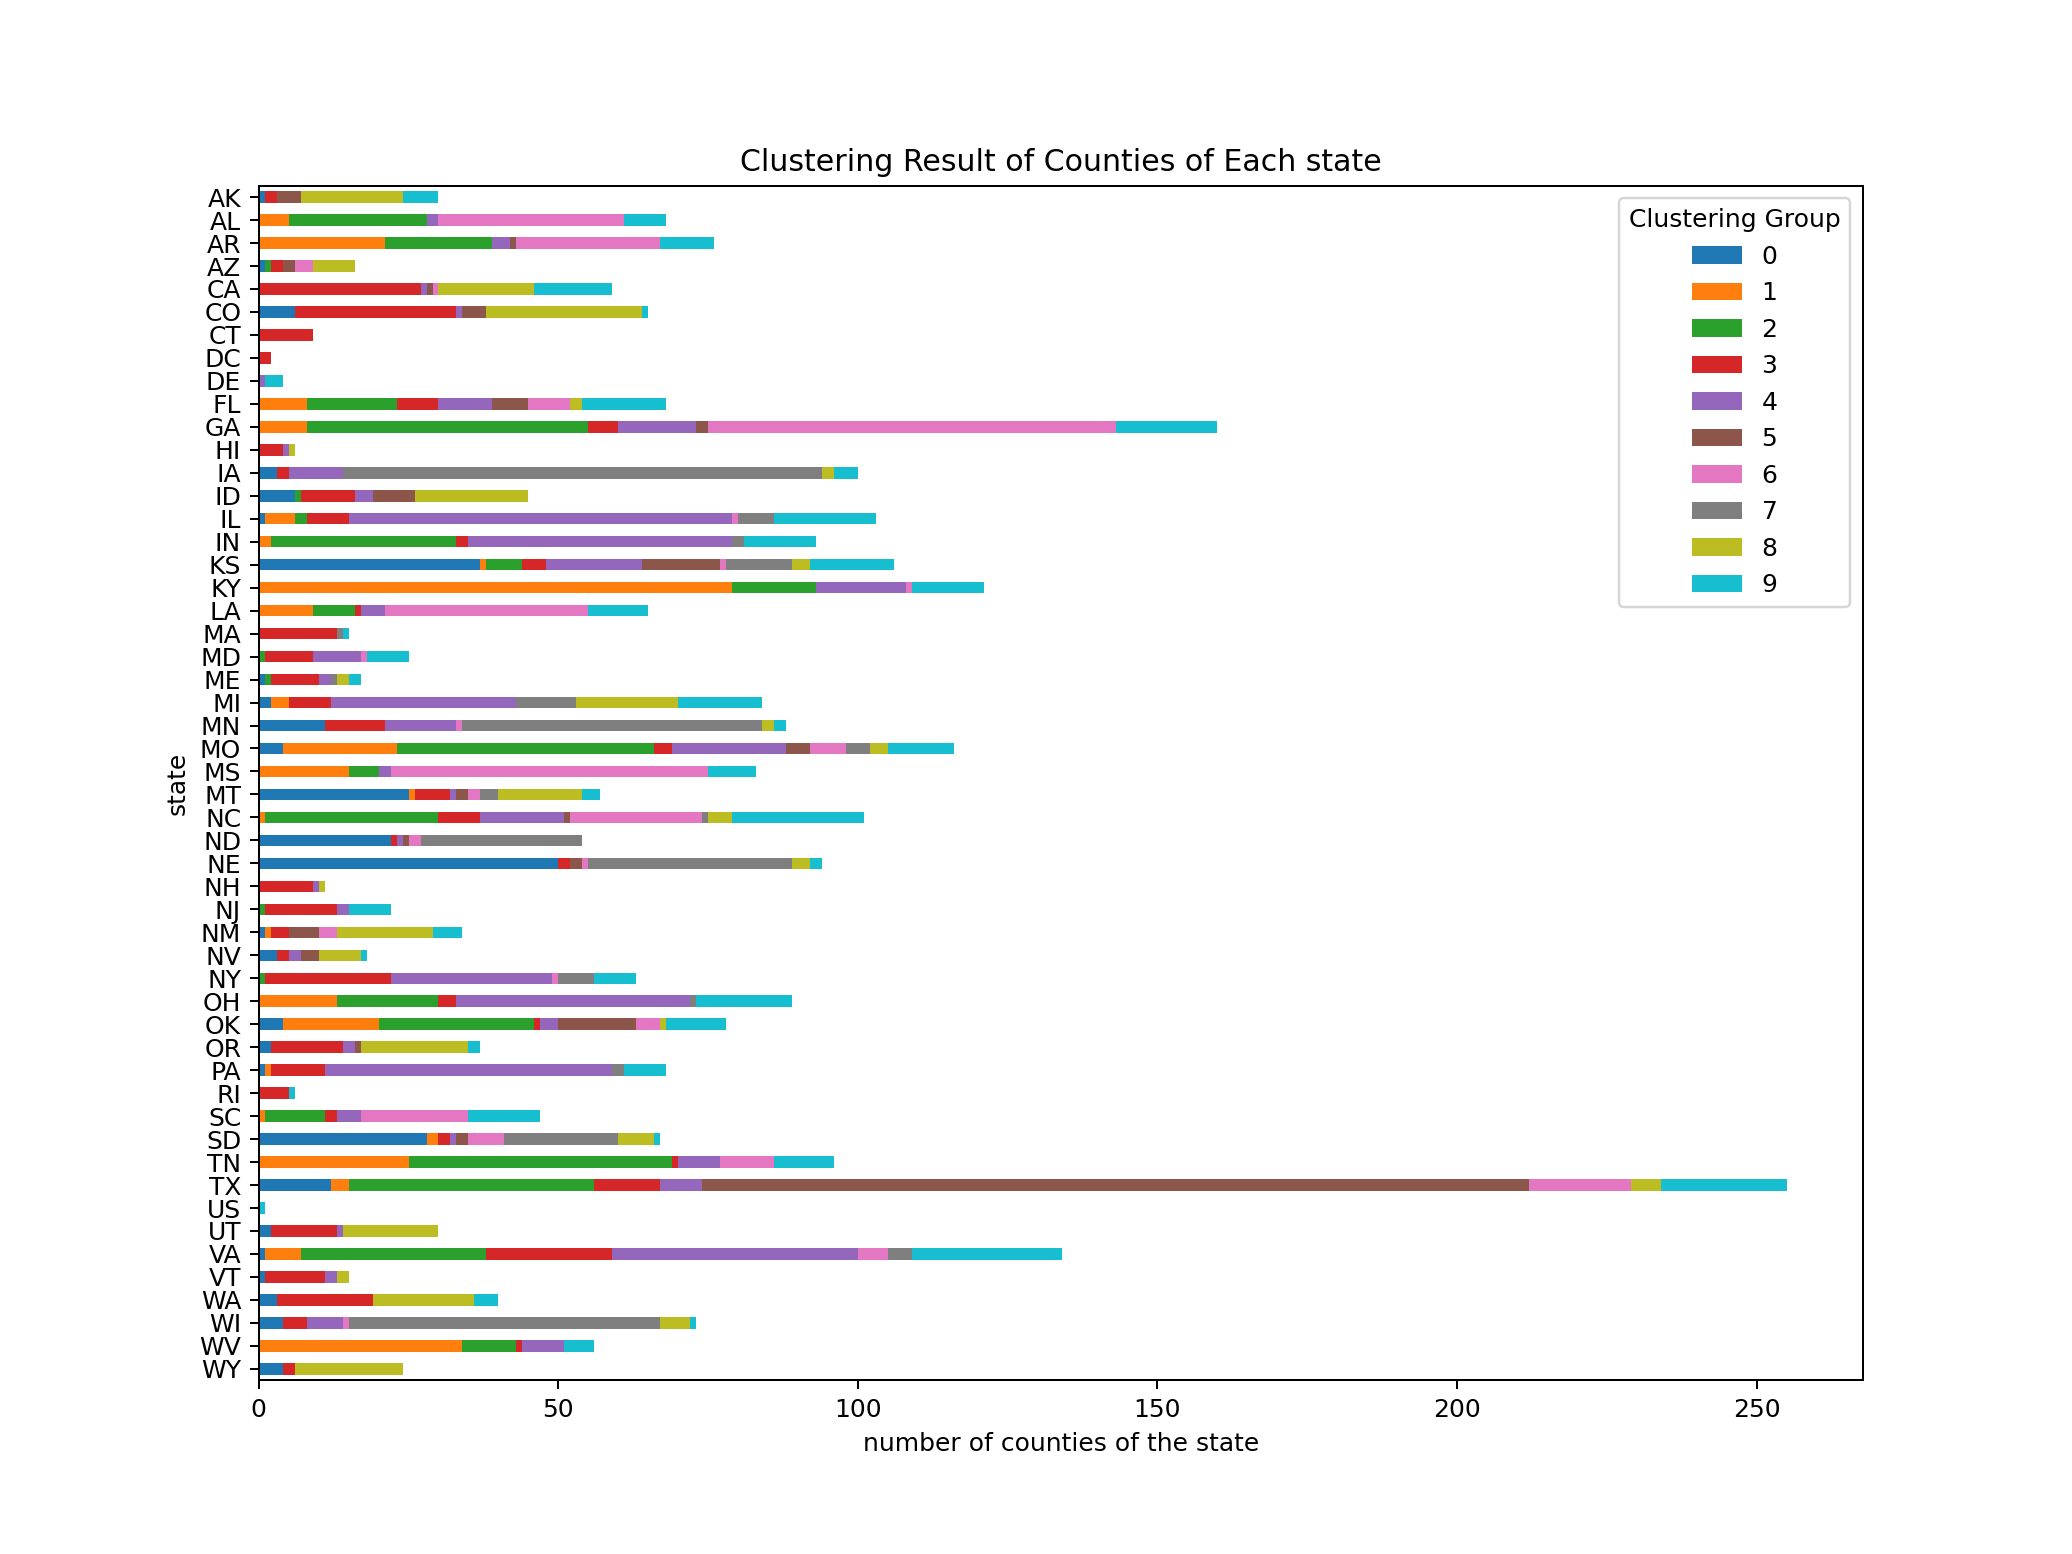

Text(0.5, 1.0, 'Clustering Result of Counties of Each state')

In [34]:
from matplotlib import ticker

ax = pivot.plot(kind='barh', stacked=True)
ax.invert_yaxis()

# format the plot
ax.set(xlabel='number of counties of the state', ylabel='state')
ax.legend(title='Clustering Group')
ax.xaxis.set_major_formatter(ticker.EngFormatter())
ax.set_title('Clustering Result of Counties of Each state')

### Clustering Conclusion:
    1. According to the Clusterng result, we found Group 1 and 6 are significant unhealthy group in at least one of the following: physical health, mental health and birthweight, so we focus on states that include relatively large proportion of these groups; In addition, Group 3 are the most healthy and we will explore it more
    2. Counties in state AR, KY, WV have high proportion in group 1 (at least 1/4), which means AR, KY, WU state are relatively unhealthy especially in physical and mental health
    3. Counties in state AL, AR, GA, LA, MS have high proportion in group 6 (at least 1/4), which means AL, AR, GA, LA, MS state are relatively unhealthy especially in significant low birthweight
    4. Countires in state CA, CO, MA, ME, NH, NI, OR, UT, VT have high proportion in group 9 (at least 1/4), which means CA, CO, MA, ME, NH, NI, OR, UT, VT are relatively healthy compared with the average level of US. In addtion, these states have relatively small number of counties, from which we can initially conclude states with less counties show relatively healthier condition. 

In [35]:
clustering_result[clustering_result['Name']=='Allegheny County']['Group']

2286    3
Name: Group, dtype: int32

For Allegheny county, it belongs to group 3: All 5 outcomes are below the average level of US. Premature death years are the least compared with other groups, very healthy. Birthweight and mental health still can make improvements

# Regression

### In regression part, we choose to use linear regressor and random forest regressor to do modeling and get insights about variables that influence premature death most

In [36]:
data_model=pd.concat([data_features,sigma['Premature death']], axis=1)

In [37]:
y=data_model['Premature death']

In [38]:
train, test = train_test_split(data_model, test_size = 0.3, random_state = 5)

In [39]:
train_X=train.drop('Premature death',axis=1)
train_y=train['Premature death']
test_X=test.drop('Premature death',axis=1)
test_y=test['Premature death']

### Linear Regression

In [40]:
model = LinearRegression()
# fit the model
model.fit(train_X, train_y)
# get importance
importance_L = model.coef_

In [41]:
# Use abosulute error to verify the model
test_pre_y=model.predict(test_X)
train_pre_y=model.predict(train_X)
test_error=mae(test_y, test_pre_y)
train_error=mae(train_y, train_pre_y)

In [42]:
print('Test error: '+str(test_error))
print('Train error: '+str(train_error))

Test error: 0.3196671279592123
Train error: 0.3238895553163934


In [43]:
importance_L

array([ 0.13819917,  0.03352653, -0.07644463,  0.06350534,  0.02056196,
       -0.12003379,  0.0183019 ,  0.04050291,  0.09941686,  0.01499501,
       -0.00964833, -0.03473989,  0.00681007,  0.0111785 , -0.04404673,
        0.00680456,  0.04124428, -0.02312579,  0.10222669,  0.06089179,
        0.07283457,  0.02872925,  0.04370592,  0.3522109 ,  0.04197668,
       -0.011998  , -0.00930191,  0.06499475,  0.01715325])

In [44]:
importance_L.argsort()

array([ 5,  2, 14, 11, 17, 25, 10, 26, 15, 12, 13,  9, 28,  6,  4, 21,  1,
        7, 16, 24, 22, 19,  3, 27, 20,  8, 18,  0, 23])

<IPython.core.display.Javascript object>


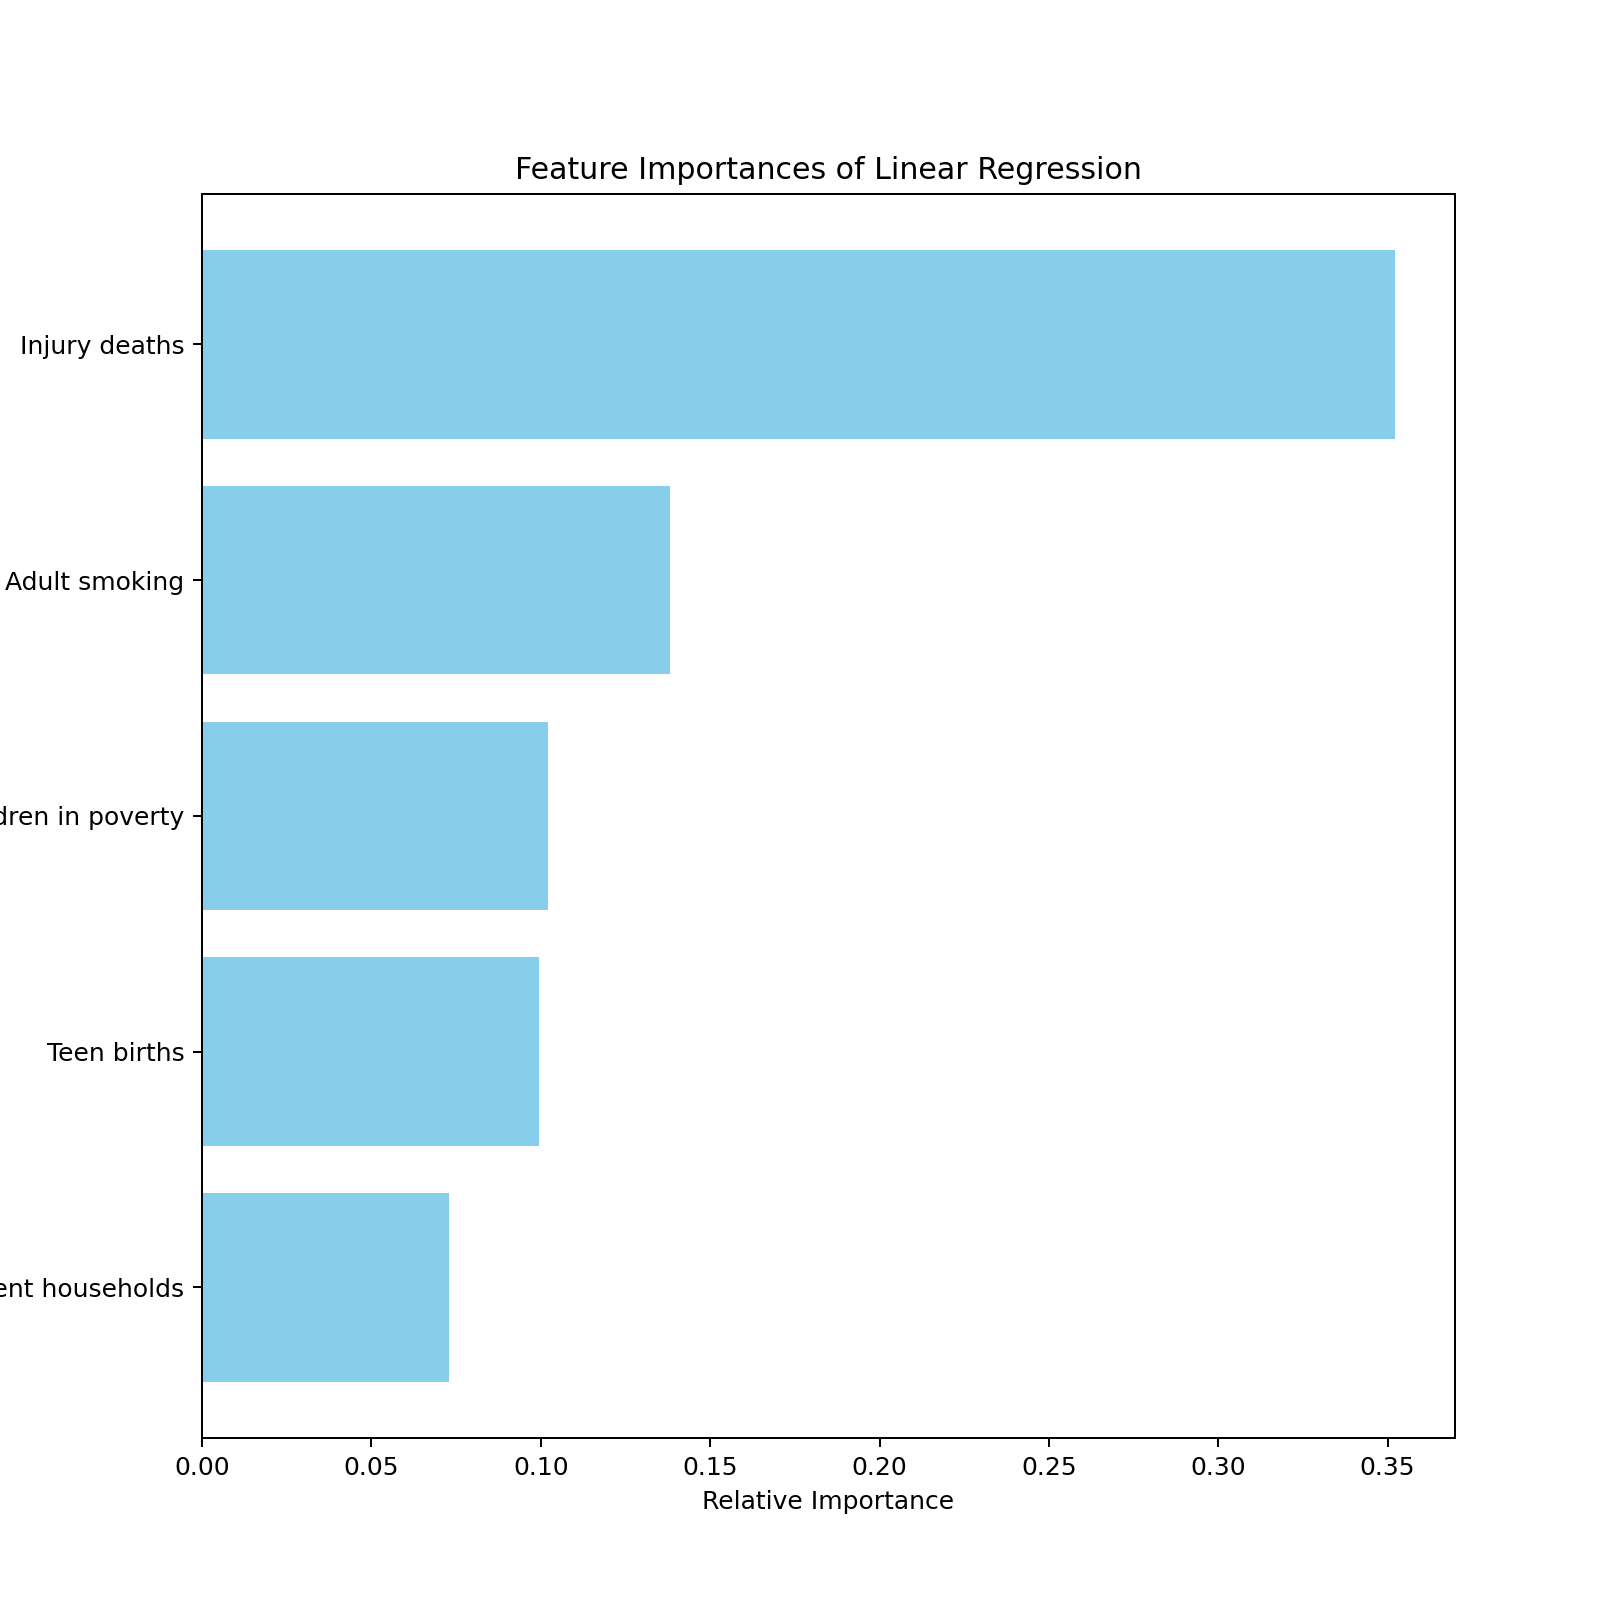

In [46]:
# Plot the five most important features
%matplotlib notebook
features=data_features.columns
indices_L=np.argsort(importance_L)
num_features=5
plt.figure(figsize=(5,5))
plt.title('Feature Importances of Linear Regression')
plt.barh(range(num_features), importance_L[indices_L[-num_features:]],color = "skyblue", align='center')
plt.yticks(range(num_features), [features[i] for i in indices_L[-num_features:]])
plt.xlabel('Relative Importance')
plt.show()

In [47]:
top_5_features_LR=[features[i] for i in indices_L[-num_features:]]

In [48]:
top_5_features_LR

['Children in single-parent households',
 'Teen births',
 'Children in poverty',
 'Adult smoking',
 'Injury deaths']

From the result, we can see the top 5 important features are Injury deaths, Adult smoking, Teen births, Children in single-parent households and violent crime.

<IPython.core.display.Javascript object>


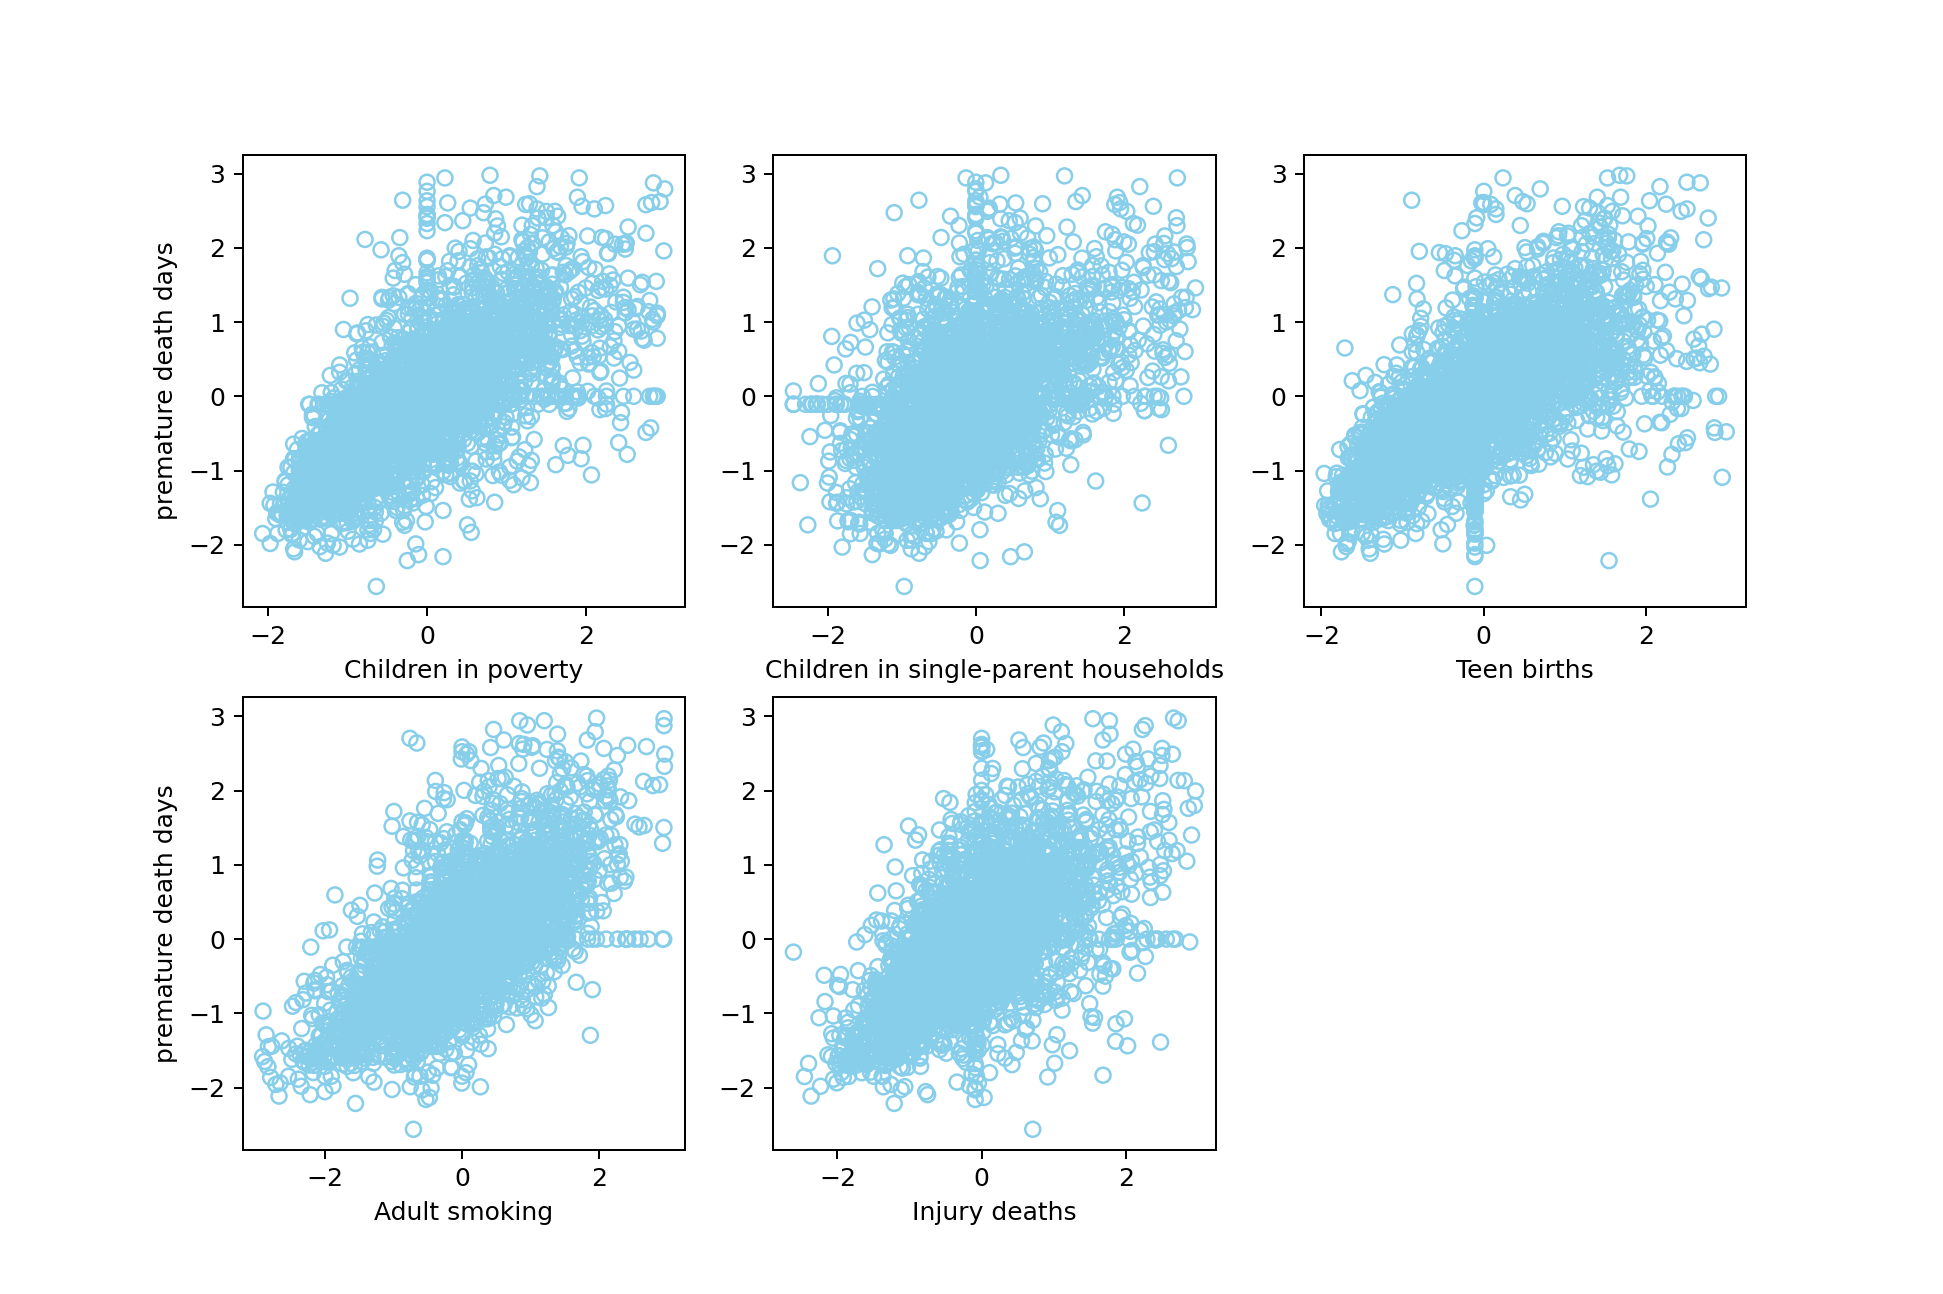

In [49]:
# To know about the relationship between these 5 features and premature death days, use scatter plot to get the reuslts
%matplotlib notebook
plt.figure(figsize=(6,4))
plt.subplot(2, 3, 1)
plt.scatter(data_features['Children in poverty'],y, marker='o', facecolors='none',edgecolors='skyblue')
plt.xlabel('Children in poverty')
plt.ylabel('premature death days')

plt.subplot(2, 3, 2)
plt.scatter(data_features['Children in single-parent households'],y,marker='o', facecolors='none',edgecolors='skyblue')
plt.xlabel('Children in single-parent households')

plt.subplot(2, 3, 3)
plt.scatter(data_features['Teen births'],y,marker='o', facecolors='none',edgecolors='skyblue')
plt.xlabel('Teen births')

plt.subplot(2, 3, 4)
plt.scatter(data_features['Adult smoking'],y,marker='o', facecolors='none',edgecolors='skyblue')
plt.xlabel('Adult smoking')
plt.ylabel('premature death days')

plt.subplot(2, 3, 5)
plt.scatter(data_features['Injury deaths'],y,marker='o', facecolors='none',edgecolors='skyblue')
plt.xlabel('Injury deaths')
plt.show()

From the results, we can see all 5 features have positive relationships with premature death days, which will be helpful for reaching the suggesions to improve the overall health condition in US

### Random Forest Regressor

In [50]:
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(train_X, train_y)

RandomForestRegressor(max_depth=2, random_state=0)

In [51]:
# Use abosulute error to verify the model
test_pre_y_RF=regr.predict(test_X)
train_pre_y_RF=regr.predict(train_X)
test_error_RF=mae(test_y, test_pre_y_RF)
train_error_RF=mae(train_y, train_pre_y_RF)

In [52]:
print('Test error: '+str(test_error_RF))
print('Train error: '+str(train_error_RF))

Test error: 0.43348079466559014
Train error: 0.4263524036220707


In [53]:
importance_r=regr.feature_importances_

<IPython.core.display.Javascript object>


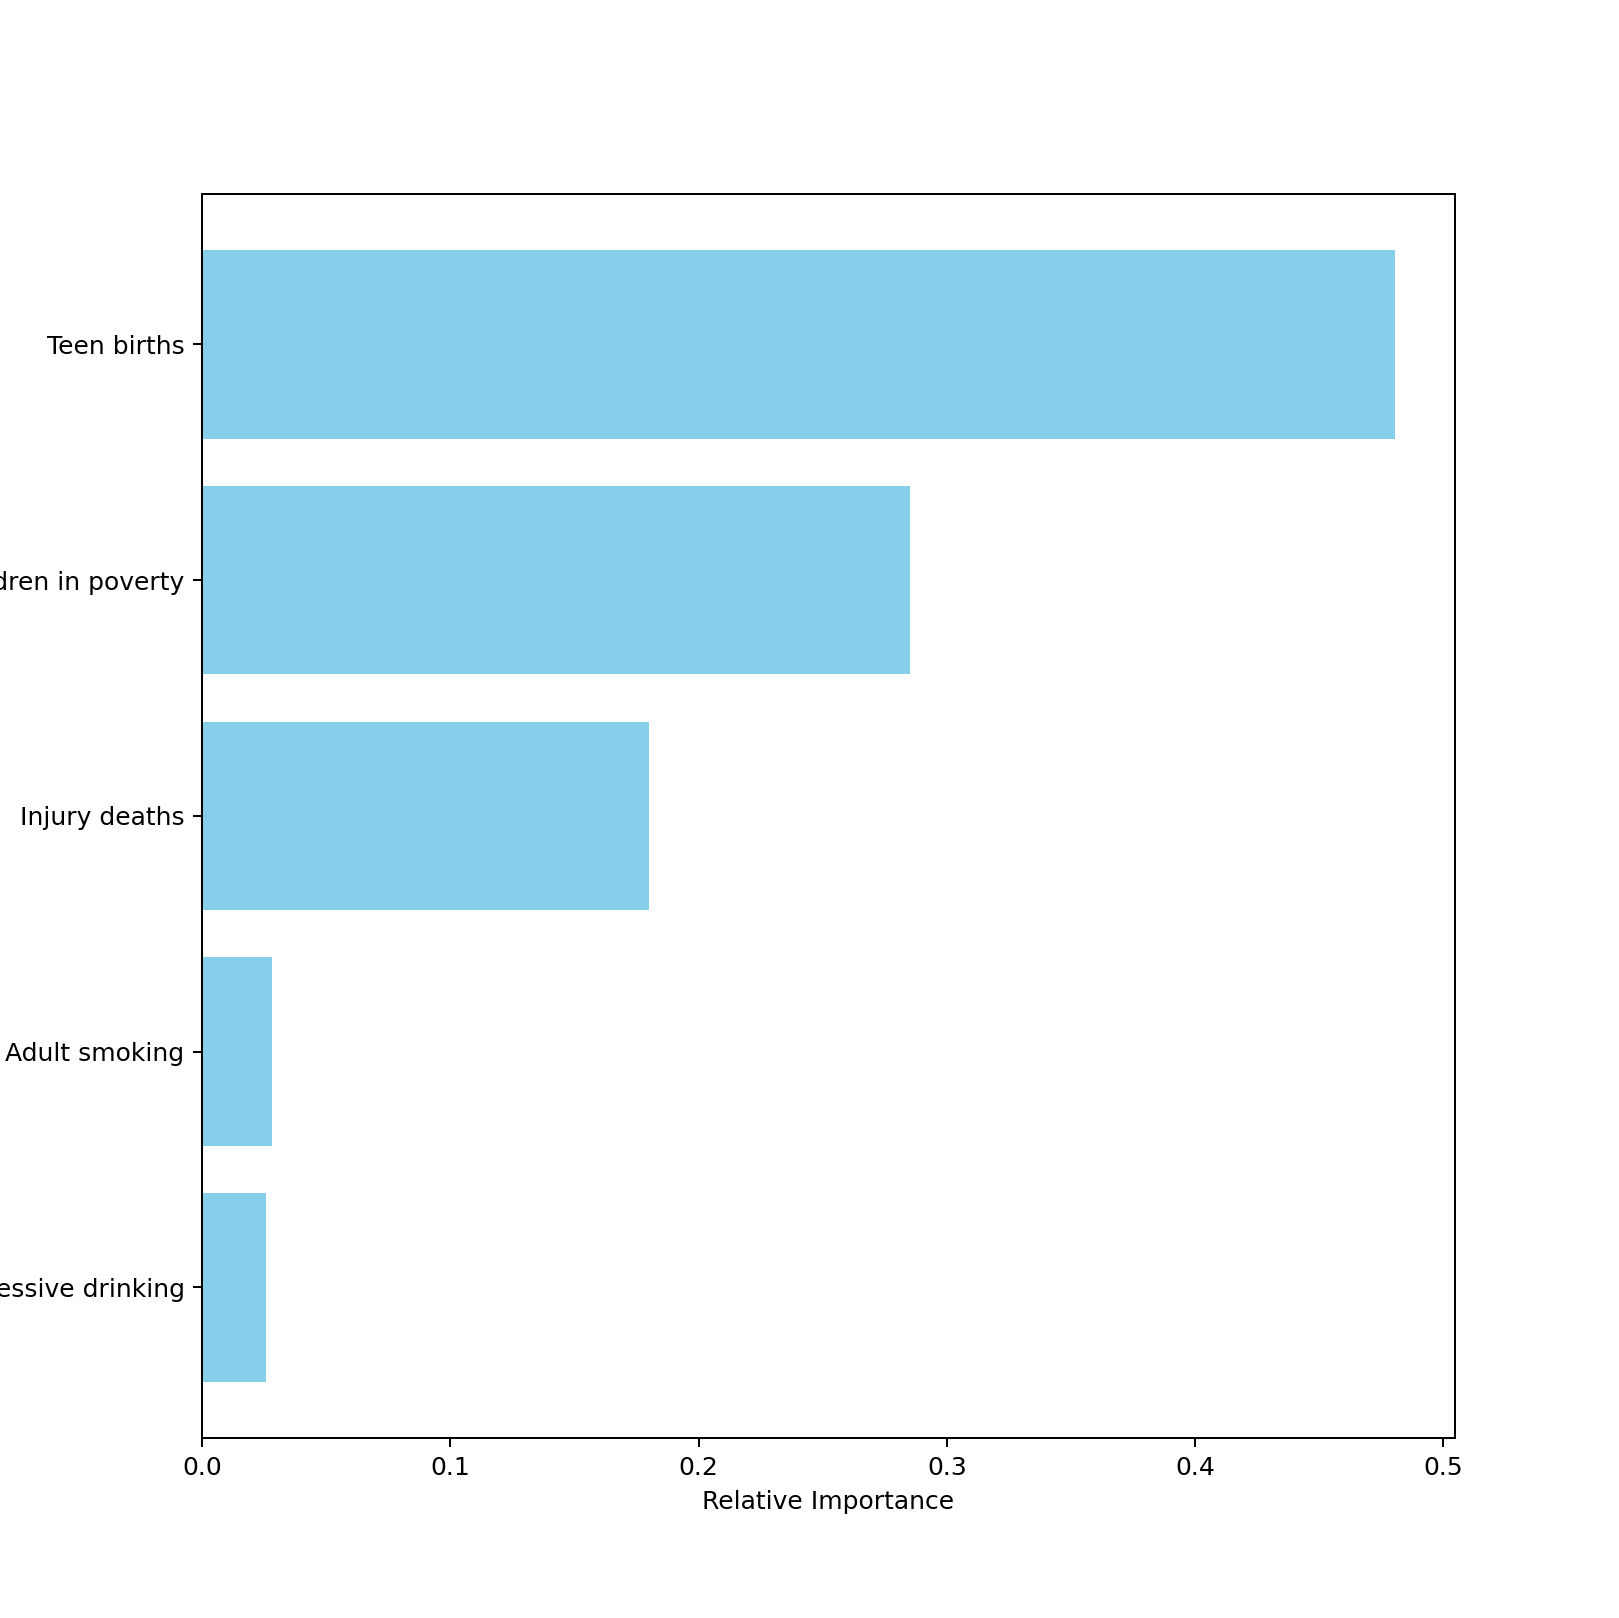

In [54]:
indices_r=np.argsort(importance_r)
num_features=5
plt.figure(figsize=(5,5))
# plt.title('Feature Importances')
plt.barh(range(num_features), importance_r[indices_r[-num_features:]],color = "skyblue", align='center')
plt.yticks(range(num_features), [features[i] for i in indices_r[-num_features:]])
plt.xlabel('Relative Importance')
plt.show()

In [55]:
top_5_features_RF=[features[i] for i in indices_r[-num_features:]]

In [56]:
top_5_features_RF

['Excessive drinking',
 'Adult smoking',
 'Injury deaths',
 'Children in poverty',
 'Teen births']

Compared the 5 important features with the result from linear regression，there is only one variable called 'Excessive drinking' that are top 5 impportant features in Random Forest Model but no in Linear Regression Model. Plot the relationship between 'Excessive drinking' and 'premature death days'

<IPython.core.display.Javascript object>


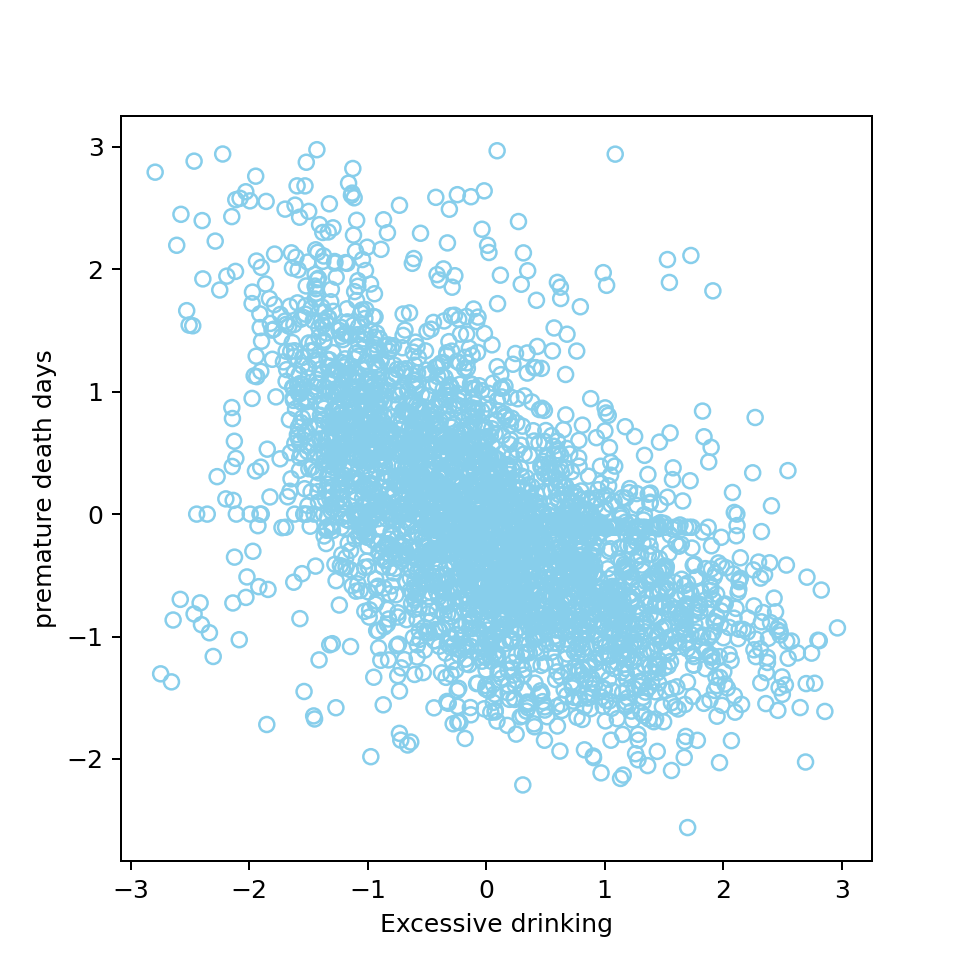

In [57]:
%matplotlib notebook
plt.figure(figsize=(3,3))
plt.scatter(data_features['Excessive drinking'],y, marker='o', facecolors='none',edgecolors='skyblue')
plt.xlabel('Excessive drinking')
plt.ylabel('premature death days')
plt.show()

Interesting! There is a negative relationship between excessive drinking and premature death! Which is not what we think about. There might be some problems with the column of excessive drinking. If there is no problem, the excessive drinking should be explored in detail. 

# Answers of required questions

##  EDA Steps:
    1. Contain relevant columns (raw_value and ranked measures)
    2. Summary Statistics (df.describe())
    3. Find out the missing values and percentage in each column and fill the null value by median
    4. Find out the outliers by calculating the z score and sigma. Define the outliers: absolute value of sigma is larger than 3, reset these outliers to sigma equal to 0
    5. Normalization, which use sigma values as new data
    6. Reduce colinearity. Calculate the correlation scores between each variable, if the correlation score is larger than 0.7, which means they are strongly related, so delete one variable
  

## Clustering


    1. For k choosing, Elbow plot is generated to choose K. Since after K=10, the curve obviously becomes flatten, we choose K=10
    2. For the grouping results, we can segment the counties into 'healthy, especially in which part' , 'Unhealthy, especially in which part', 'in the middle, but more likely to be healthy/unhealthy in which part'. 
    3. For states with relatively less counties, the health condition tends to be better (CA, CO, MA, ME, NH, NI, OR, UT, VT)
    4. Some states shows relatively pessimistic health condition. AR, KY, WV state are relatively unhealthy especially in physical and mental health; AL, AR, GA, LA, MS state are relatively unhealthy especially in significant low birthweight
    5. For Allegheny county, it shows very healthy. Premature death years are the least compared with other groups. Birthweight and mental health still can make improvements

# Important features of supervised learning model

    1. For linear regression, the top-5 important features are Injury deaths, Adult smoking, Teen births, Children in single-parent households and Children in poverty
    2. For random forest regressor, the top-5 important features are Adult smoking, Excessive drinking, Injury deaths, Teen births, Children in poverty
    3. For model evaluation, mean absolute error is choosed. Two models are not overfitting and shows low mean absolute error(around 0.3-0.4). To avoid overfitting, linear regression and random forest regressor are choosed because they are simple, which can avoid overfitting to some extend. In addition, reduce the redundant variables is another way to avoid overfitting

# Which model is better?

    1. Linear regressor is better than random forest regressor. The mean absolute error of linear regressor is less. In addition, features of this dataset is 35-dimension, which is pretty high, and linear regression is pretty simple, which could avoid overfitting to some extend. What's more, in EDA, we found there is linear relationship between the target value and features, thus it's a good idea to use linear regressor.

# Suggestion for improving public health

    1. States with small number of counties shows relatively better public health condition, while for large states (large number of counties), the proportion of counties that shows positive health condition doesn't exceed 1/4. Department of health should pay attention to large states to see whether there is an uneven distribution of resources and insufficient recourses. 
    2. Injury deaths, Adult smoking, Excessive Drinking, Teen births, Children in single-parent households and Children in poverty are important factors to decide the potential life loss years before 75 years old. To improve the public health condition, policies like controling excessive smoking and drinking, provide special care to children in poverty and single-parent family could be proposed. 
    3. For Allegheny county, it shows very healthy. Premature death years are the least compared with other groups. Birthweight and mental health still can make improvements. 